<a href="https://colab.research.google.com/github/shyamjith94/Machine-Learning-Regression/blob/main/RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install turicreate

In [2]:
import turicreate as tc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import log, sqrt
from sklearn.utils import shuffle

In [3]:
def get_polynomial_frame(feature, degree):
    """ Creating Sframe with using degree range
        of poer of columns"""
    # initilize empty sframe
    poly_frame = tc.SFrame()
    poly_frame["power_1"] = feature
    if degree >1:
        # power_1 predefind by initial feature loop range start from two
        for i in range(2, degree+1):
            name = "power_" + str(i)
            poly_frame[name] = feature.apply(lambda x: x**i)
    return poly_frame

**overfitting in polynomial regression**


In [4]:
data = tc.SFrame.read_csv("/content/drive/My Drive/Machine Learning: Regression/Data/2/c_kc_house_data.csv/kc_house_data.csv")

Finished parsing file /content/drive/My Drive/Machine Learning: Regression/Data/2/c_kc_house_data.csv/kc_house_data.csv

Parsing completed. Parsed 100 lines in 1.38622 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/Machine Learning: Regression/Data/2/c_kc_house_data.csv/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.10879 secs.

In [5]:
data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0


In [6]:
data = data.sort(["sqft_living", "price"])

In [7]:
data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0
2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0
1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0
1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0
6896300380,20141002T000000,228000.0,0,1.0,390,5900,1.0,0,0
9266700190,20150511T000000,245000.0,1,1.0,390,2000,1.0,0,0
6303400395,20150130T000000,325000.0,1,0.75,410,8636,1.0,0,0
4322200105,20150331T000000,229050.0,1,1.0,420,3298,1.0,0,0
7549801385,20140612T000000,280000.0,1,0.75,420,6720,1.0,0,0
8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0


In [8]:
l2_small_penalty = 1e-5

In [9]:
poly_data = get_polynomial_frame(data['sqft_living'], 15)
train_features = poly_data.column_names()
poly_data['price'] = data['price']
poly_data.head()

power_1,power_2,power_3,power_4,power_5,power_6,power_7
290,84100,24389000,7072810000,2051114900000,594823321000000,1.7249876309e+17
370,136900,50653000,18741610000,6934395700000,2565726409000000,9.4931877133e+17
380,144400,54872000,20851360000,7923516800000,3010936384000000,1.14415582592e+18
384,147456,56623104,21743271936,8349416423424,3206175906594816,1.2311715481324093e+18
390,152100,59319000,23134410000,9022419900000,3518743761000000,1.37231006679e+18
390,152100,59319000,23134410000,9022419900000,3518743761000000,1.37231006679e+18
410,168100,68921000,28257610000,11585620100000,4750104241000000,1.94754273881e+18
420,176400,74088000,31116960000,13069123200000,5489031744000000,2.30539333248e+18
420,176400,74088000,31116960000,13069123200000,5489031744000000,2.30539333248e+18
430,184900,79507000,34188010000,14700844300000,6321363049000000,2.71818611107e+18


In [10]:
model = tc.linear_regression.create(poly_data, target='price', 
                                    features=train_features, l2_penalty=l2_small_penalty,
                                    validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.032444     | 2667753.941195     | 245406.229117                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [11]:
model._get('coefficients')


name,index,value,stderr
(intercept),None,146954.83736389806,176520.2297418725
power_1,None,193.6512204405194,572.7457053502787
power_2,None,-0.009102256549156775,0.7044762616277944
power_3,None,-1.905348396499463e-05,0.0004061811278635236
power_4,None,8.733987892839225e-09,9.883425720111277e-08
power_5,None,-2.73057058123161e-14,5.0265186273673224e-15
power_6,None,-1.8943671162943485e-16,5.244889968235547e-16
power_7,None,-7.63300238931095e-20,3.9451177962443714e-18
power_8,None,9.717877726985082e-24,1.9854291591821534e-21
power_9,None,1.6905375774905395e-28,4.537574600729275e-25


In [12]:
subset_1, subset_2= data.random_split(.5, seed=0)
set_1, set_2 = subset_1.random_split(.5, seed=0)
set_3, set_4 = subset_2.random_split(.5, seed=0)

In [13]:
poly_data_1 = get_polynomial_frame(set_1["sqft_living"], 15)
poly_data_2 = get_polynomial_frame(set_2["sqft_living"], 15)
poly_data_3 = get_polynomial_frame(set_3["sqft_living"], 15)
poly_data_4 = get_polynomial_frame(set_4["sqft_living"], 15)

In [14]:
poly_data_1["price"] = set_1["price"]
poly_data_2["price"] = set_2["price"]
poly_data_3["price"] = set_3["price"]
poly_data_4["price"] = set_4["price"]

In [15]:
model_set_1 = tc.linear_regression.create(poly_data_1, target='price', 
                                               features=train_features,
                                               l2_penalty=1e-5,
                                               validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.022361     | 2163371.458926     | 248665.441469                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [16]:
model_set_2 = tc.linear_regression.create(poly_data_2, target='price', 
                                               features=train_features,
                                               l2_penalty=1e-5,
                                               validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.017973     | 1976898.111469     | 234347.353420                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [17]:
model_set_3 = tc.linear_regression.create(poly_data_3, target='price', 
                                               features=train_features,
                                               l2_penalty=1e-5,
                                               validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.016503     | 2122855.230292     | 250215.819587                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [18]:
model_set_4 = tc.linear_regression.create(poly_data_4, target='price', 
                                               features=train_features,
                                               l2_penalty=1e-5,
                                               validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.021844     | 2382492.578853     | 244333.497114                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [19]:
coefficients_model_set_1 = model_set_1._get('coefficients')
print("Model Set One Coefficients")
print(coefficients_model_set_1 )

coefficients_model_set_2 = model_set_2._get('coefficients')
print("Model Set Two Coefficients")
print(coefficients_model_set_2,"\n")

coefficients_model_set_3 = model_set_3._get('coefficients')
print("Model Set Three Coefficients")
print(coefficients_model_set_3,"\n")

coefficients_model_set_4 = model_set_4._get('coefficients')
print("Model Set Four Coefficients")
print(coefficients_model_set_4,"\n")

Model Set One Coefficients
+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    27906.03294915834    |   361324.00028920633   |
|   power_1   |  None |    529.2726013464928    |   1133.0858688302512   |
|   power_2   |  None |   -0.3422578302748154   |   1.3305535380085116   |
|   power_3   |  None |  0.00012100091702246916 | 0.0007223419824700383  |
|   power_4   |  None | -1.3200209355078345e-08 | 1.6319494555523728e-07 |
|   power_5   |  None |  -9.479206242146704e-15 | 9.950398044407895e-15  |
|   power_6   |  None |  3.125686499749349e-16  | 1.0571277866037087e-15 |
|   power_7   |  None |  6.465862819092042e-21  | 4.713595447780252e-18  |
|   power_8   |  None |  6.622314258571005e-25  | 2.0146467878511577e-21 |
|   power_9   |  None | -3.8142985782990165e-29 | 3.616192835401716e-25  

Text(0.5, 1.0, 'Degree Of 15 Set One Prediction')

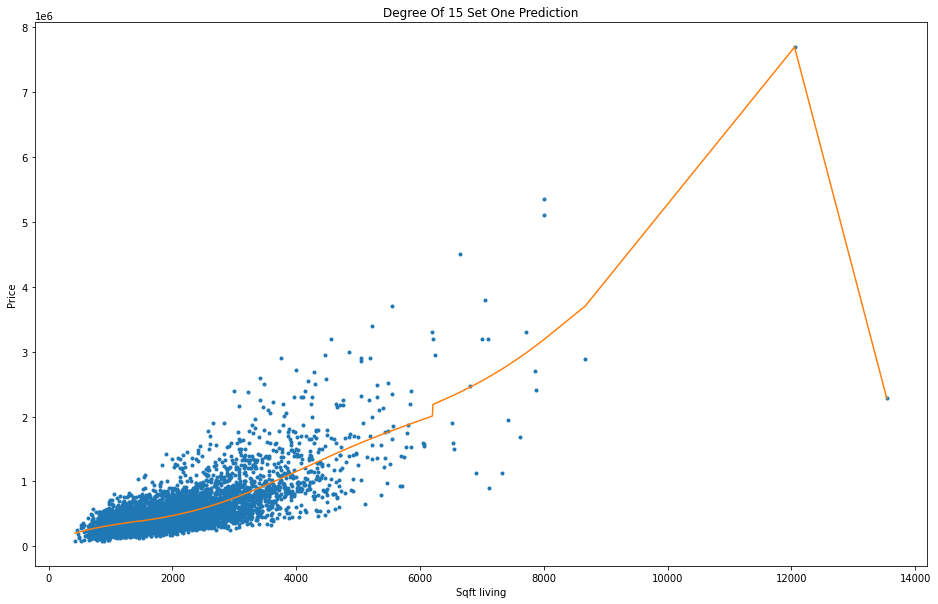

In [20]:
# Model 1
plt.figure(figsize=(16, 10))
plt.plot(poly_data_1["power_1"], poly_data_1["price"], ".",
         poly_data_1["power_1"], model_set_1.predict(poly_data_1), "-")
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 Set One Prediction")


Text(0.5, 1.0, 'Degree Of 15 Set Two Prediction')

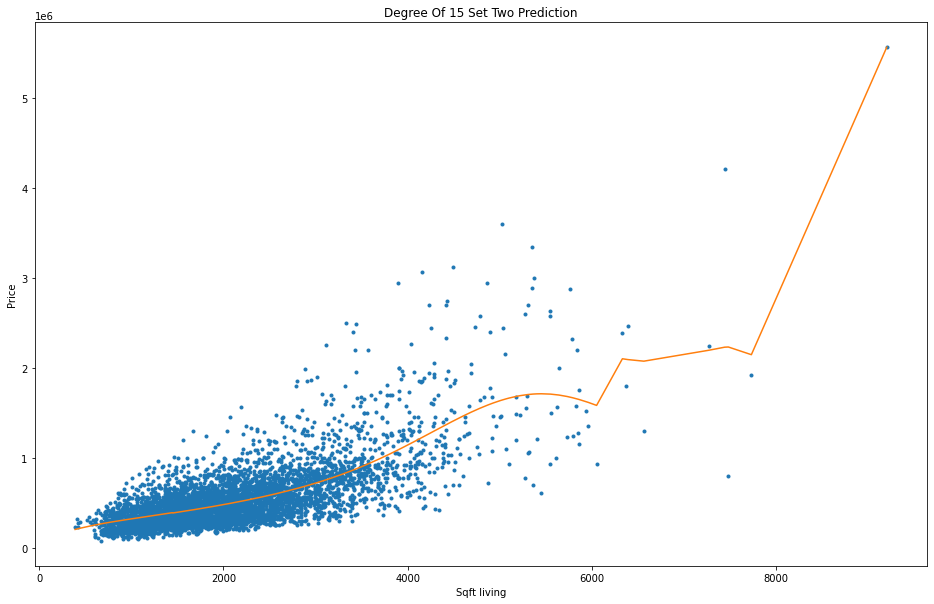

In [21]:
# Model 2
plt.figure(figsize=(16, 10))
plt.plot(poly_data_2["power_1"], poly_data_2["price"], ".",
         poly_data_2["power_1"], model_set_2.predict(poly_data_2), "-")
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 Set Two Prediction")


Text(0.5, 1.0, 'Degree Of 15 Set Three Prediction')

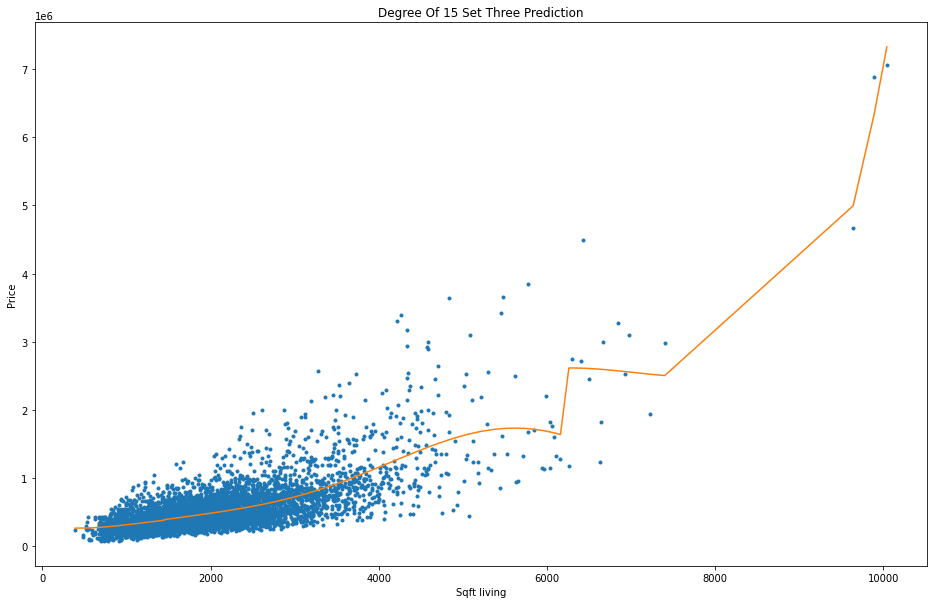

In [22]:
# Model 3
plt.figure(figsize=(16, 10))
plt.plot(poly_data_3["power_1"], poly_data_3["price"], ".",
         poly_data_3["power_1"], model_set_3.predict(poly_data_3), "-")
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 Set Three Prediction")

Text(0.5, 1.0, 'Degree Of 15 Set Four Prediction')

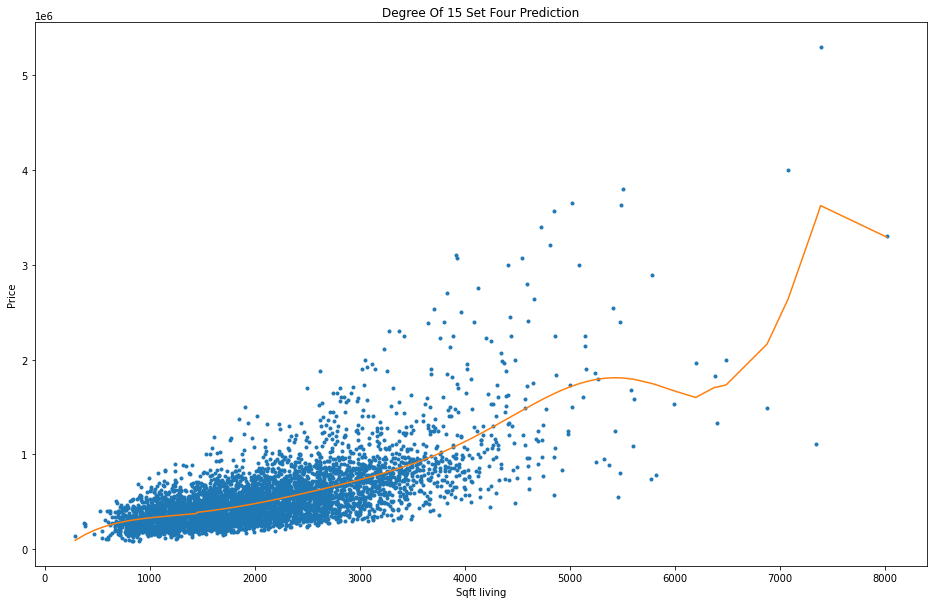

In [23]:
# Model 4
plt.figure(figsize=(16, 10))
plt.plot(poly_data_4["power_1"], poly_data_4["price"], ".",
         poly_data_4["power_1"], model_set_4.predict(poly_data_4), "-")
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 Set Four Prediction")

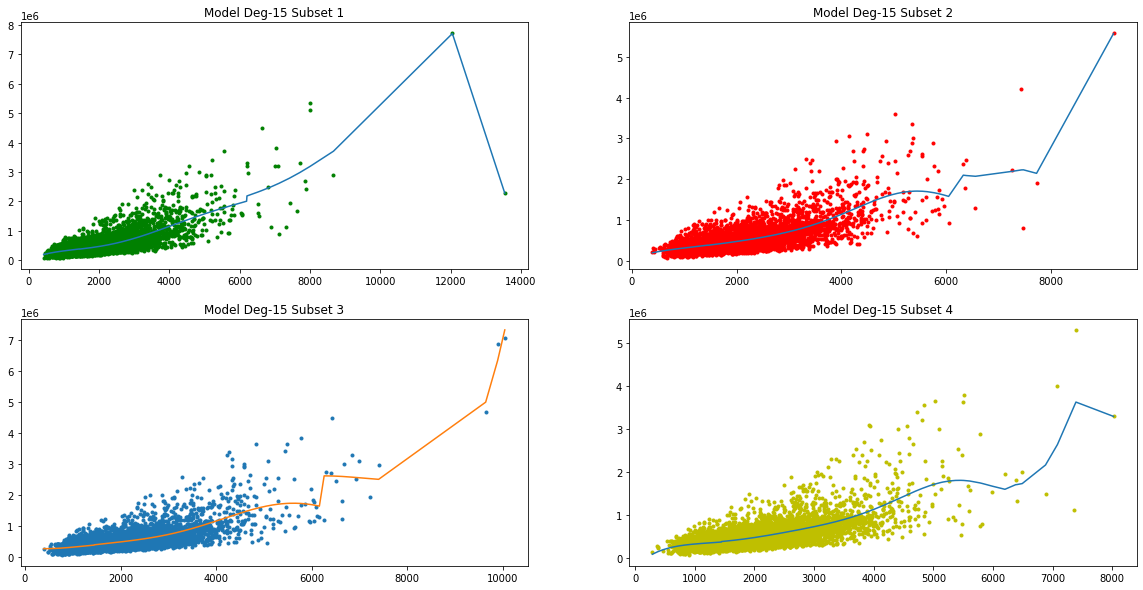

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs[0, 0].set_title("Model Deg-15 Subset 1")
axs[0, 0].plot(poly_data_1["power_1"], poly_data_1["price"], "g.", poly_data_1["power_1"],
               model_set_1.predict(poly_data_1), "-")

axs[0, 1].set_title("Model Deg-15 Subset 2")
axs[0, 1].plot(poly_data_2["power_1"], poly_data_2["price"], "r.", poly_data_2["power_1"],
               model_set_2.predict(poly_data_2), "-",)

axs[1, 0].set_title("Model Deg-15 Subset 3")
axs[1, 0].plot(poly_data_3["power_1"], poly_data_3["price"], ".", poly_data_3["power_1"],
               model_set_3.predict(poly_data_3), "-")

axs[1, 1].set_title("Model Deg-15 Subset 4")
axs[1, 1].plot(poly_data_4["power_1"], poly_data_4["price"], "y.", poly_data_4["power_1"],
               model_set_4.predict(poly_data_4), "-")

**fit new polynomial regression for all sets with larger L2 penalty**

In [25]:
large_l2_penalty = 1e5

In [26]:
ridge_model_set_1 = tc.linear_regression.create(poly_data_1, target='price', 
                                               features=train_features,
                                               l2_penalty=large_l2_penalty,
                                               validation_set=None)

ridge_model_set_2 = tc.linear_regression.create(poly_data_2, target='price', 
                                               features=train_features,
                                               l2_penalty=large_l2_penalty,
                                               validation_set=None)

ridge_model_set_3 = tc.linear_regression.create(poly_data_3, target='price', 
                                               features=train_features,
                                               l2_penalty=large_l2_penalty,
                                               validation_set=None)

ridge_model_set_4 = tc.linear_regression.create(poly_data_4, target='price', 
                                               features=train_features,
                                               l2_penalty=large_l2_penalty,
                                               validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.028480     | 6163831.995694     | 374179.152237                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.022383     | 3207348.164674     | 323472.905660                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.020195     | 3890401.464711     | 351873.627370                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.015669     | 3870944.319743     | 323871.651477                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [27]:
coefficients_ridge_model_set_1 = ridge_model_set_1._get('coefficients')
print("Ridge Model Set One Coefficients")
print(coefficients_ridge_model_set_1,"\n" )

coefficients_ridge_model_set_2 = ridge_model_set_2._get('coefficients')
print("Ridge Model Set Two Coefficients")
print(coefficients_ridge_model_set_2,"\n")

coefficients_ridge_model_set_3 = ridge_model_set_3._get('coefficients')
print("Ridge Model Set Three Coefficients")
print(coefficients_ridge_model_set_3,"\n")

coefficients_ridge_model_set_4 = ridge_model_set_4._get('coefficients')
print("Ridge Model Set Four Coefficients")
print(coefficients_ridge_model_set_4,"\n")

Ridge Model Set One Coefficients
+-------------+-------+------------------------+------------------------+
|     name    | index |         value          |         stderr         |
+-------------+-------+------------------------+------------------------+
| (intercept) |  None |   527324.2762739562    |   543702.0412346877    |
|   power_1   |  None |   2.5822981177364746   |   1705.0101827835613   |
|   power_2   |  None | 0.0012818210957370158  |   2.0021495223351593   |
|   power_3   |  None | 1.782757128446565e-07  | 0.0010869436019310089  |
|   power_4   |  None | 1.1010743153045427e-11 | 2.455674822224556e-07  |
|   power_5   |  None | 1.9649102760503744e-15 | 1.4972854622200498e-14 |
|   power_6   |  None | -4.866848214199476e-16 | 1.5907123107302578e-15 |
|   power_7   |  None | 1.8455415460945956e-24 | 7.092779512186785e-18  |
|   power_8   |  None | 1.130932392681518e-28  | 3.031538370118899e-21  |
|   power_9   |  None | 7.135825842330691e-33  | 5.441463685037419e-25  |
+----

Text(0.5, 1.0, 'Degree Of 15 Set 1 Prediction Ridge')

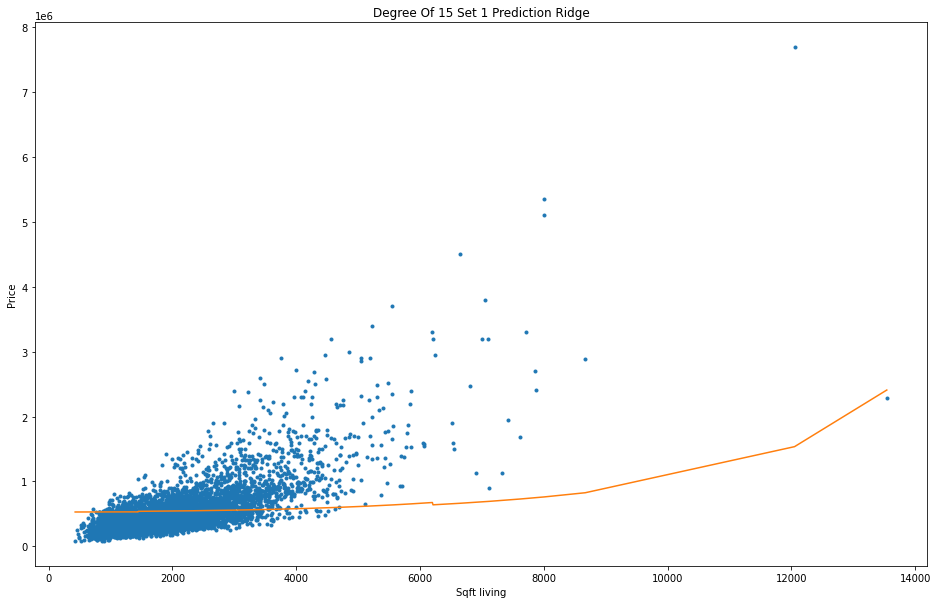

In [28]:
# Model 1
plt.figure(figsize=(16, 10))
plt.plot(poly_data_1["power_1"], poly_data_1["price"], ".",
         poly_data_1["power_1"], ridge_model_set_1.predict(poly_data_1), "-")
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 Set 1 Prediction Ridge")

Text(0.5, 1.0, 'Degree Of 15 Set 2 Prediction Ridge')

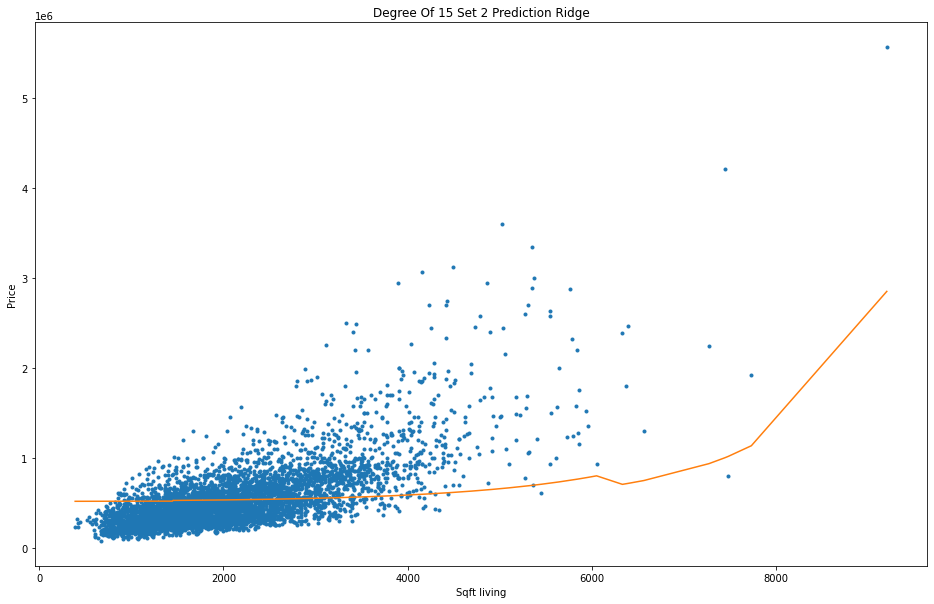

In [29]:
# Model 2
plt.figure(figsize=(16, 10))
plt.plot(poly_data_2["power_1"], poly_data_2["price"], ".",
         poly_data_2["power_1"], ridge_model_set_2.predict(poly_data_2), "-")
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 Set 2 Prediction Ridge")

Text(0.5, 1.0, 'Degree Of 15 Set 3 Prediction Ridge')

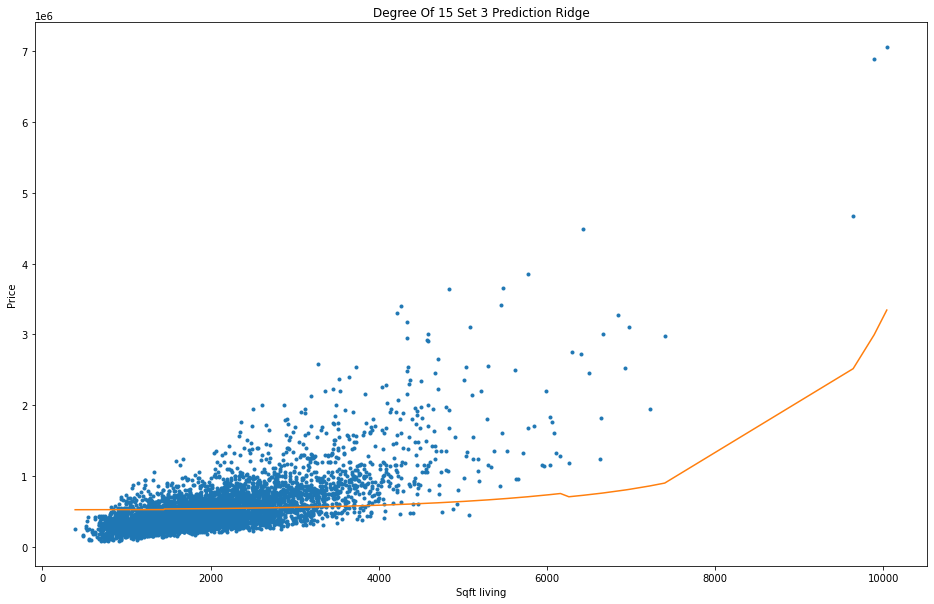

In [30]:
# Model 3
plt.figure(figsize=(16, 10))
plt.plot(poly_data_3["power_1"], poly_data_3["price"], ".",
         poly_data_3["power_1"], ridge_model_set_3.predict(poly_data_3), "-")
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 Set 3 Prediction Ridge")

Text(0.5, 1.0, 'Degree Of 15 Set 4 Prediction Ridge')

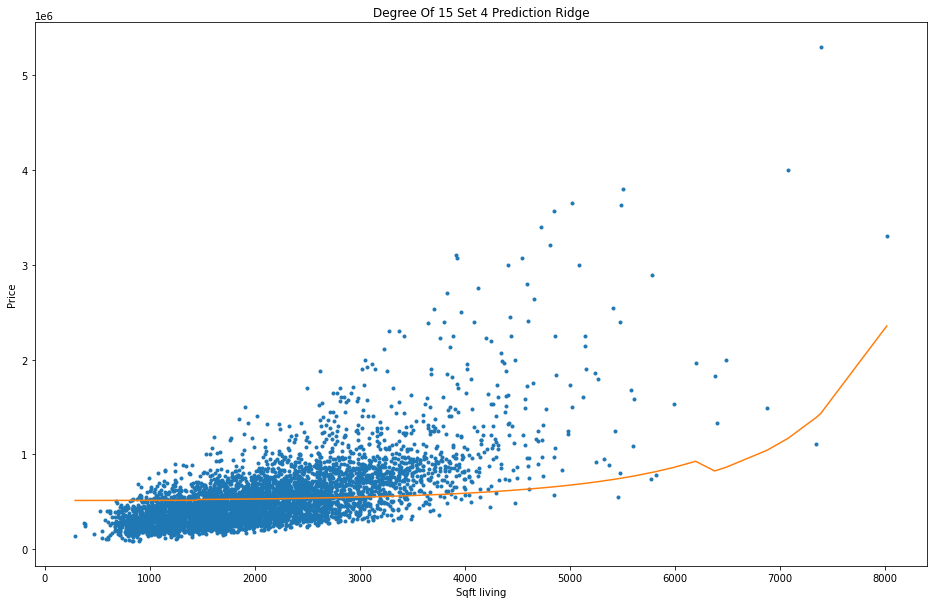

In [31]:
# Model 4
plt.figure(figsize=(16, 10))
plt.plot(poly_data_4["power_1"], poly_data_4["price"], ".",
         poly_data_4["power_1"], ridge_model_set_4.predict(poly_data_4), "-")
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 Set 4 Prediction Ridge")

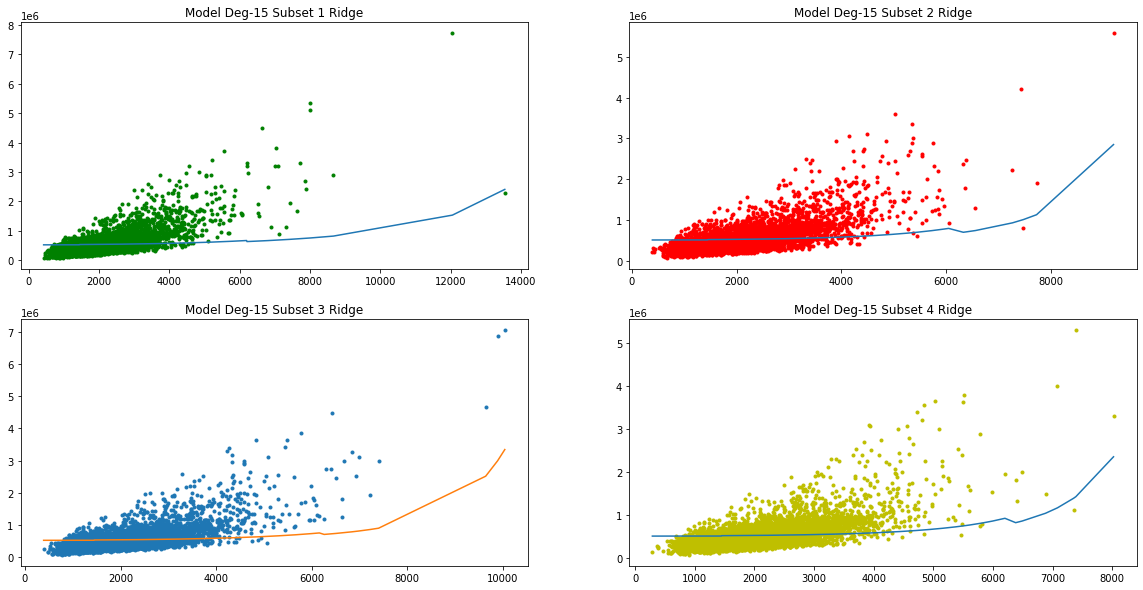

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs[0, 0].set_title("Model Deg-15 Subset 1 Ridge")
axs[0, 0].plot(poly_data_1["power_1"], poly_data_1["price"], "g.", poly_data_1["power_1"],
               ridge_model_set_1.predict(poly_data_1), "-")

axs[0, 1].set_title("Model Deg-15 Subset 2 Ridge")
axs[0, 1].plot(poly_data_2["power_1"], poly_data_2["price"], "r.", poly_data_2["power_1"],
               ridge_model_set_2.predict(poly_data_2), "-",)

axs[1, 0].set_title("Model Deg-15 Subset 3 Ridge")
axs[1, 0].plot(poly_data_3["power_1"], poly_data_3["price"], ".", poly_data_3["power_1"],
               ridge_model_set_3.predict(poly_data_3), "-")

axs[1, 1].set_title("Model Deg-15 Subset 4 Ridge")
axs[1, 1].plot(poly_data_4["power_1"], poly_data_4["price"], "y.", poly_data_4["power_1"],
               ridge_model_set_4.predict(poly_data_4), "-")

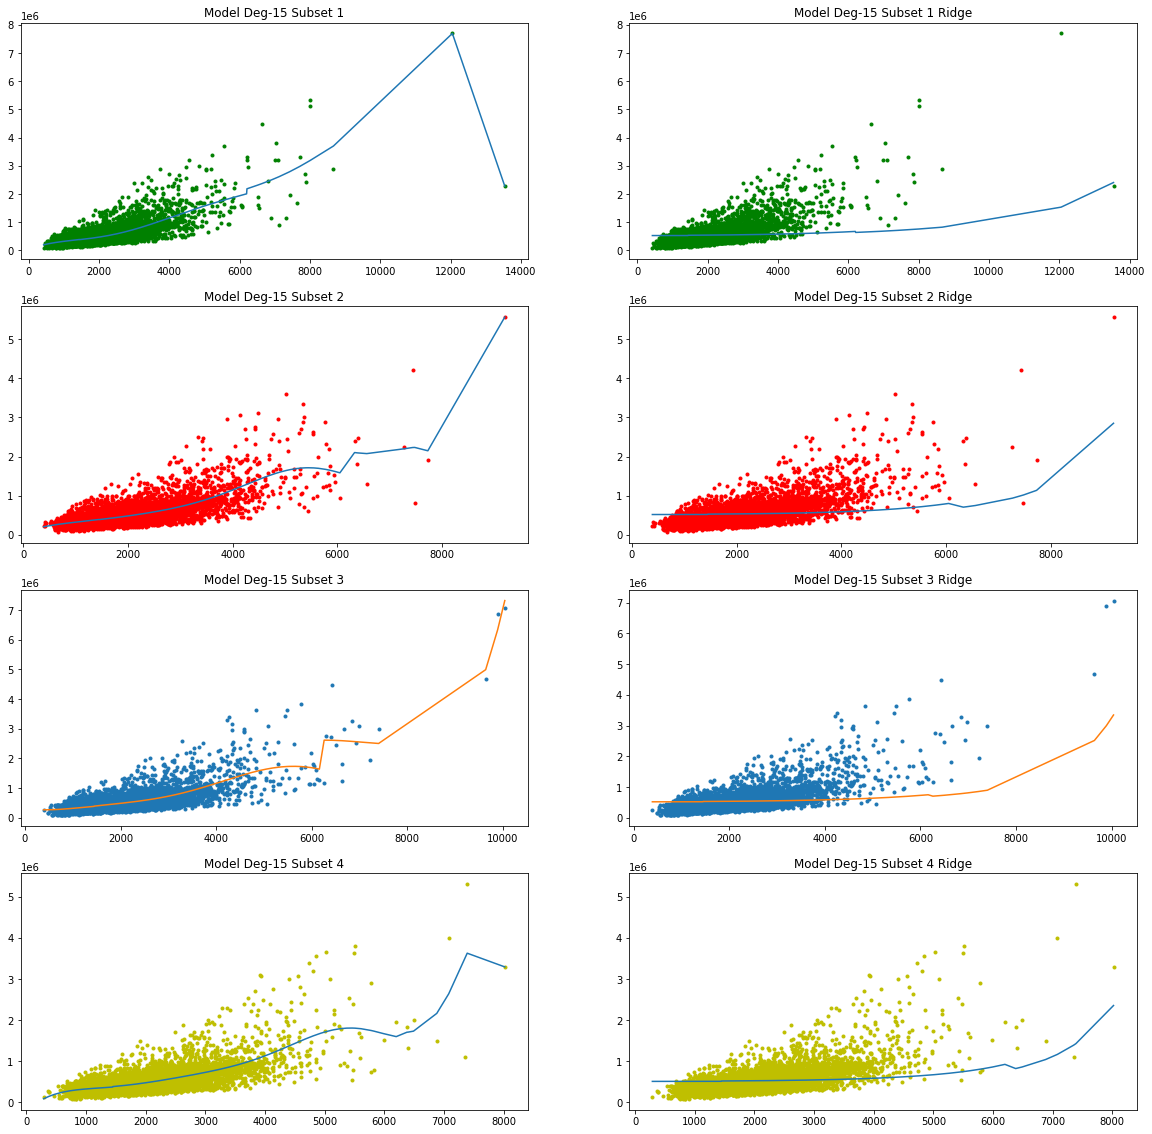

In [33]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

axs[0, 0].set_title("Model Deg-15 Subset 1")
axs[0, 0].plot(poly_data_1["power_1"], poly_data_1["price"], "g.", poly_data_1["power_1"],
               model_set_1.predict(poly_data_1), "-")

axs[1, 0].set_title("Model Deg-15 Subset 2")
axs[1, 0].plot(poly_data_2["power_1"], poly_data_2["price"], "r.", poly_data_2["power_1"],
               model_set_2.predict(poly_data_2), "-",)

axs[2, 0].set_title("Model Deg-15 Subset 3")
axs[2, 0].plot(poly_data_3["power_1"], poly_data_3["price"], ".", poly_data_3["power_1"],
               model_set_3.predict(poly_data_3), "-")

axs[3, 0].set_title("Model Deg-15 Subset 4")
axs[3, 0].plot(poly_data_4["power_1"], poly_data_4["price"], "y.", poly_data_4["power_1"],
               model_set_4.predict(poly_data_4), "-")

axs[0, 1].set_title("Model Deg-15 Subset 1 Ridge")
axs[0, 1].plot(poly_data_1["power_1"], poly_data_1["price"], "g.", poly_data_1["power_1"],
               ridge_model_set_1.predict(poly_data_1), "-")

axs[1, 1].set_title("Model Deg-15 Subset 2 Ridge")
axs[1, 1].plot(poly_data_2["power_1"], poly_data_2["price"], "r.", poly_data_2["power_1"],
               ridge_model_set_2.predict(poly_data_2), "-",)

axs[2, 1].set_title("Model Deg-15 Subset 3 Ridge")
axs[2, 1].plot(poly_data_3["power_1"], poly_data_3["price"], ".", poly_data_3["power_1"],
               ridge_model_set_3.predict(poly_data_3), "-")

axs[3, 1].set_title("Model Deg-15 Subset 4 Ridge")
axs[3, 1].plot(poly_data_4["power_1"], poly_data_4["price"], "y.", poly_data_4["power_1"],
               ridge_model_set_4.predict(poly_data_4), "-")

In [34]:
# spliting data into equail segment each sectio have n/k elements
train_valid, test = data.random_split(.9, seed=0)
shuffle_train_valid = shuffle(train_valid.to_dataframe().values, random_state=1)
length = len(shuffle_train_valid)
print("length is :-\t", length)
k_fold = 10  # 10 fold for cross validation
for i in range(k_fold):
    start = length*i/k_fold
    end = (length*(i+1))/k_fold-1
    print(i, "\t", (start, end),"\t",(start-end))


length is :-	 19410
0 	 (0.0, 1940.0) 	 -1940.0
1 	 (1941.0, 3881.0) 	 -1940.0
2 	 (3882.0, 5822.0) 	 -1940.0
3 	 (5823.0, 7763.0) 	 -1940.0
4 	 (7764.0, 9704.0) 	 -1940.0
5 	 (9705.0, 11645.0) 	 -1940.0
6 	 (11646.0, 13586.0) 	 -1940.0
7 	 (13587.0, 15527.0) 	 -1940.0
8 	 (15528.0, 17468.0) 	 -1940.0
9 	 (17469.0, 19409.0) 	 -1940.0


In [35]:
train_valid_shuffled = tc.SFrame(data=pd.DataFrame(data=shuffle_train_valid, columns=train_valid.column_names()))
train_valid_shuffled[:10]

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
2154970020,20140703T000000,2351960.0,4,4.25,5010,19412,2.0,0,1
1205000215,20150429T000000,455000.0,2,1.5,1090,6750,1.0,0,0
5021900265,20140702T000000,659000.0,4,2.0,2090,10800,1.0,0,0
3024079057,20140730T000000,410000.0,3,1.5,1750,32500,1.0,0,0
1724069079,20150319T000000,1452000.0,2,3.25,2070,3128,2.0,1,3
8731902340,20140918T000000,275000.0,4,1.75,1960,6177,1.0,0,0
1604600790,20150211T000000,316000.0,2,2.0,860,3000,1.0,0,0
8682262240,20150330T000000,505000.0,2,2.5,1900,5065,2.0,0,0
9477201060,20150423T000000,380500.0,3,1.0,1410,7854,1.0,0,0
1982200330,20140513T000000,665000.0,3,2.0,1940,5820,1.5,0,0


In [36]:
validation4 = train_valid_shuffled[5818:7757]

In [37]:
train4 = train_valid_shuffled[0:5817].append(train_valid_shuffled[7758:19395])

In [38]:
def k_fold_cross_validation(k_value, l2_penalty, data, output_name, feature_list):
    """ k_value     :- spliting segment of n number of observation
        l2_penalty  :- l2 value of linear regression model
        data        :- data frame(Sfrane)
        output_name :- model output name (Price)
        feature_list:- tuning paramiter of model
        
        compute the start and indces of segment call start and end
        from vlidation set by taking (start:end+1) from data
        training set append by (end+1:n) to end of slice (0:start)
        train linear model using l2_penality
        compute cross validation error usinf formed validation set
        return the average cross validation error"""
    n = len(data)
    total_validation_error = 0.0
    for i in range(k_value):
        start = (n*i)/k_value
        end = (n*(i+1))/k_value-1

        # creating validation set
        validation = data[start:end]
        train = data[0:start].append(data[end+1:n])
        
        # creating model
        model = tc.linear_regression.create(train, features=feature_list, target=output_name, verbose=False,
                                            l2_penalty=l2_penalty, validation_set=validation)

        # compute validation error
        validation_predicted = model.predict(validation)
        validation_error = ((validation_predicted-validation[output_name])**2).sum()
        total_validation_error += validation_error
    # average validation error
    average_validation_error = total_validation_error/k_value
    print("value of l2_penalty {:.2f} ===> average validation error {:.5e}".format(l2_penalty, average_validation_error))
    return average_validation_error

In [39]:
train_valid, test = data.random_split(.9, seed=0)
shuffle_train_valid = shuffle(train_valid.to_dataframe().values, random_state=1)

poly_train_valid_shuffled = get_polynomial_frame(train_valid_shuffled['sqft_living'], 15)

my_features = poly_train_valid_shuffled.column_names() # get the name of the features
poly_train_valid_shuffled['price'] = train_valid_shuffled['price'] 

In [40]:
# Two lists holding error penality value
l2_penalty_validation_error = []
l2_penalty_values = []

# checking cross valiation using 13 diffrent penalty values
for l2_penalty in np.logspace(1, 7, num=13):
    l2_penalty_values.append(l2_penalty)
    validation_error = k_fold_cross_validation(10, l2_penalty, poly_train_valid_shuffled, 'price', my_features)
    l2_penalty_validation_error.append(validation_error)

value of l2_penalty 10.00 ===> average validation error 5.10102e+14
value of l2_penalty 31.62 ===> average validation error 2.40327e+14
value of l2_penalty 100.00 ===> average validation error 1.37439e+14
value of l2_penalty 316.23 ===> average validation error 1.17867e+14
value of l2_penalty 1000.00 ===> average validation error 1.19526e+14
value of l2_penalty 3162.28 ===> average validation error 1.21385e+14
value of l2_penalty 10000.00 ===> average validation error 1.32380e+14
value of l2_penalty 31622.78 ===> average validation error 1.70158e+14
value of l2_penalty 100000.00 ===> average validation error 2.25418e+14
value of l2_penalty 316227.77 ===> average validation error 2.45971e+14
value of l2_penalty 1000000.00 ===> average validation error 2.51626e+14
value of l2_penalty 3162277.66 ===> average validation error 2.55521e+14
value of l2_penalty 10000000.00 ===> average validation error 2.57375e+14


In [41]:
for l2, error in zip(l2_penalty_values, l2_penalty_validation_error):
    if error== min(l2_penalty_validation_error):
        print('The best l2 penalty value is ', l2)

The best l2 penalty value is  316.22776601683796


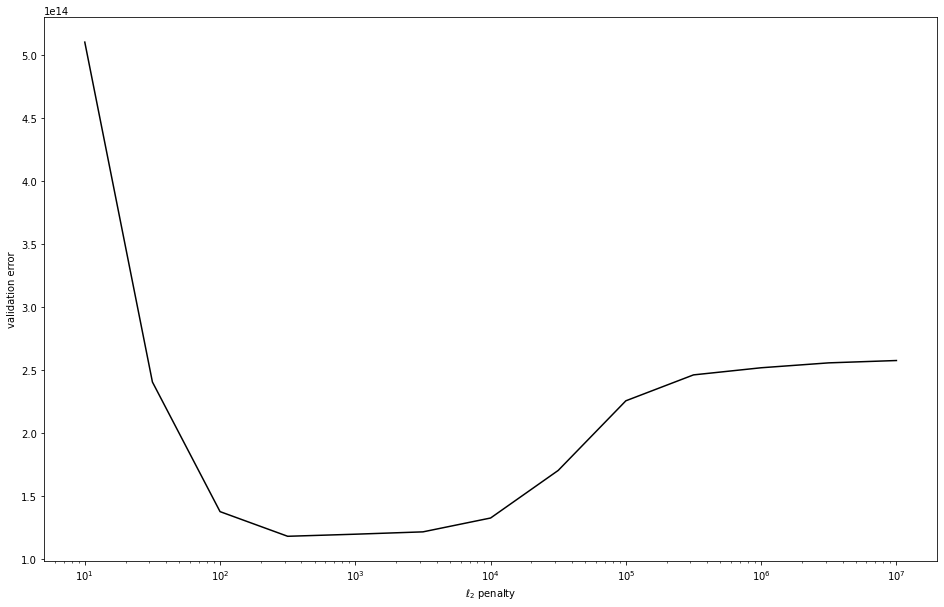

In [42]:
plt.figure(figsize=(16, 10))
plt.plot(l2_penalty_values,l2_penalty_validation_error,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('validation error')
plt.xscale('log')

**Using the best L2 penalty found above, train a model using all training data**

In [43]:
# train_valid, test
poly_train_valid = get_polynomial_frame(train_valid['sqft_living'], 15)
my_features = poly_train_valid.column_names() # get the name of the features
poly_train_valid['price'] = train_valid['price']

final_model = tc.linear_regression.create(poly_train_valid, target = 'price', 
                                                features = my_features, verbose = False,
                                                l2_penalty=3.16e2,
                                                validation_set = None)

In [44]:
test_predictions = final_model.predict(test)
test_error = ((test_predictions - test['price'])**2).sum()
print('{:.5e}'.format(test_error))

3.27968e+14
